# PCA算法简介

PCA主成分分析通过线性变换将原始数据变换为一组各维度线性无关的表示，可用于提取数据的主要特征分量，常用于高维数据的降维。
降维当然意味着信息的丢失，不过鉴于实际数据本身常常存在的相关性，可以想办法在降维的同时将信息的损失尽量降低。

## 问题

- 我们到底删除哪一维损失的信息才最小？亦或根本不是单纯删除几列，而是通过某些变换将原始数据变为更少的列但又使得丢失的信息最小？
- 到底如何度量丢失信息的多少？
- 如何根据原始数据决定具体的降维操作步骤？

## 基本思路

PCA通过严格的数学推理来处理了这些问题。这里不重视严格推理，简要掌握过程。

### 降维与基变换

根据线性代数的知识可以知道，选择不同的基可以对同样一组数据给出不同的表示（向量向不同基方向投影结果就是坐标），而且如果基的数量少于向量本身的维数，则可以达到降维的效果。

而矩阵相乘就是线性变化，可以作用于一组基上，使之变为另一种基，也就是说选择矩阵变换的形式对应了选择某种基。

但是如何选择基才是最优的。或者说，如果有一组N维向量，现在要将其降到K维（K小于N），那么我们应该如何选择K个基才能最大程度保留原有的信息？

直观上讲是希望投影后的投影值尽可能分散。因为如果不相同的点投影后重叠了，那就是一种严重的信息丢失。举个例子：


[[-1. -1.  0.  2.  0.]
 [-2.  0.  0.  1.  1.]]


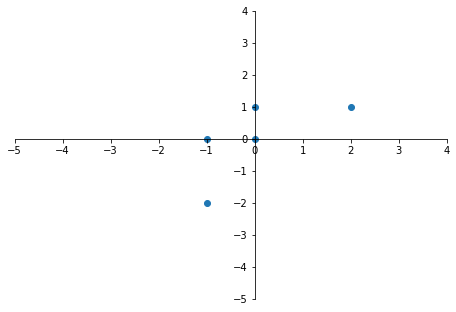

In [1]:
import numpy as np
import matplotlib.pyplot as plt
a=np.array([[1,1,2,4,2],[1,3,3,4,4]])
a=np.array([(a[0]-np.mean(a[0])),(a[1]-np.mean(a[1]))])
print(a)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(a[0],a[1])
ax.set_xlim([-5,4])
ax.set_ylim([-5,4])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()



### 方差

如上图所示，如果我们必须使用一维来表示这些数据，又希望尽量保留原始的信息，你要如何选择？

这个问题实际上是要在二维平面中选择一个方向，将所有数据都投影到这个方向所在直线上，用投影值表示原始记录。这是一个实际的二维降到一维的问题。

那么如何选择这个方向（或者说基）才能尽量保留最多的原始信息呢？一种直观的看法是：希望投影后的投影值尽可能分散。

希望投影后投影值尽可能分散，而这种分散程度，可以用数学上的方差来表述。

一个字段的方差可以看做是每个元素与字段均值的差的平方和的均值。

于是上面的问题被形式化表述为：寻找一个**一维基**，使得所有数据变换为这个基上的坐标表示后，方差值最大。

### 协方差

但是对于较高维的情况，如何考虑？

考虑三维降到二维问题。与之前相同，首先我们希望找到一个方向使得投影后方差最大，这样就完成了第一个方向的选择，继而我们选择第二个投影方向。

如果我们还是单纯只选择方差最大的方向，很明显，这个方向与第一个方向应该是“几乎重合在一起”，显然这样的维度是没有用的，因此，应该有其他约束条件。
因为相关性意味着两个字段不是完全独立，必然存在重复表示的信息。

数学上可以用两个字段的协方差表示其相关性。为了让协方差为0，我们选择第二个基时只能在与第一个基正交的方向上选择。因此最终选择的两个方向一定是正交的。

至此，我们得到了降维问题的优化目标：
将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位（模为1）正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段的方差则尽可能大（在正交的约束下，取最大的K个方差）。

### 协方差矩阵

数学上，各字段两两间协方差和字段的方差两者可以被**统一到一个矩阵**。

对于任一m个n维数据（归一化过的）组成的n*m矩阵X：

$C=\frac{1}{m} XX^T$

为一个对称矩阵，其对角线各元素为各个字段的方差，矩阵是对角阵，第i行第j列元素表示i和j两个字段的协方差。

### 协方差矩阵对角化

现在可以发现要达到优化目的，等价于将协方差矩阵对角化：即除对角线外的其它元素化为0，并且在对角线上将元素按大小从上到下排列，这样我们就实现了各字段两两间协方差为0，而字段的方差则尽可能大，前面最大的几行就是要选的维数。

令P是一组基按行组成的矩阵，设Y=PX，则Y为X对P做基变换后的数据。设Y的协方差矩阵为D，推导D与C的关系：

$$D=\frac{1}{m} YY^T=\frac{1}{m} (PX)(PX)^T=\frac{1}{m} PXX^TP^T=P(\frac{1}{m}XX^T)P^T=PCP^T$$

所以现在就很清楚了，就是要找一个P，使得PCP^T=D矩阵其除对角线外的其它元素为0，对角线上元素从大到小排列。

### PCA

上述问题在数学上早就被解决了，不是什么大问题。因为C是一个实对称矩阵，寻找C的特征值和特征向量是很常见的问题。

对C的n个特征向量组成的矩阵E有：

$E^TCE=\Lambda$

$\Lambda$是对角阵，各元素为各特征向量对应的特征值。

因此，$P=E^T$，即P是协方差矩阵的特征向量单位化后按行排列出的矩阵，其中每一行都是C的一个特征向量。
设P按照$\Lambda$中特征值的从大到小，将特征向量从上到下排列，则用P的前K行组成的矩阵乘以原始数据矩阵X，就得到了我们需要的降维后的数据矩阵Y。


In [2]:
C=1/5*np.dot(a,a.T)
print(C)
# 求特征值
eigenvalue,featurevector=np.linalg.eig(C)
print(eigenvalue)
P=featurevector.T
print(P)
# 验证C的对角化
D=P.dot(C).dot(P.T)
print(D)
# 用P的第一行乘以数据矩阵，就得到了降维后的表示
Y=P[0].dot(a)
print(Y)

[[1.2 0.8]
 [0.8 1.2]]
[2.  0.4]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[ 2.00000000e+00  0.00000000e+00]
 [-1.38777878e-16  4.00000000e-01]]
[-2.12132034 -0.70710678  0.          2.12132034  0.70710678]
